In [1]:
%matplotlib inline
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
subj = 'F16_P32'
path = 'E:/Celine/Ferret_b2n_edti/'+subj+'/'
fnifti = path+'P32_F16_23052014_MSME_TEsum_magn_FP.nii'#path+subj+'_T2.nii'

img = nib.load(fnifti)
data = img.get_data()

fnifti_mask = path+'P32_F16_23052014_MSME_mask_FP.nii'# path+subj+'_T2_mask.nii'

img_mask = nib.load(fnifti_mask)
data_mask = img_mask.get_data()

print data.shape
print data_mask.shape

(190L, 350L, 140L)
(190L, 350L, 140L)


In [3]:
data_mask[data_mask>1]=1

In [4]:
maskedData = data_mask * data[:,:,:] 
print maskedData.shape

(190L, 350L, 140L)


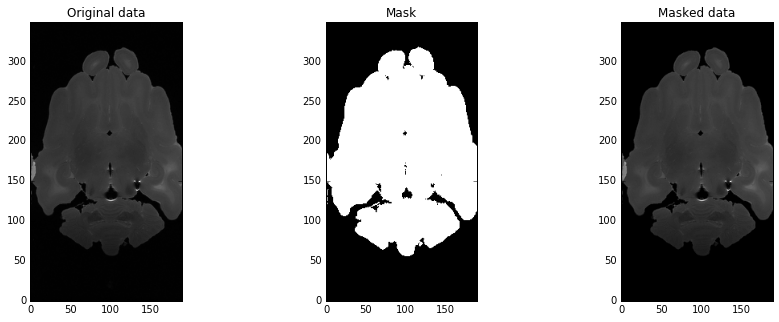

In [6]:
fig, (ax2,ax1,ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(15)
val=50
ax1.imshow(data_mask[:, :, val].T, cmap='gray', origin='lower')
ax1.set_title('Mask')
ax2.imshow(data[:, :, val].T, cmap='gray', origin='lower')
ax2.set_title('Original data')
ax3.imshow(maskedData[:, :, val].T, cmap='gray', origin='lower')
ax3.set_title('Masked data')

In [7]:
img_maskedData = nib.Nifti1Image(maskedData, img.affine)

In [8]:
fMaskedData = path+subj+'_T2_masked_GOOD.nii'
nib.save(img_maskedData, fMaskedData)